In [43]:
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from time import time, sleep
import os

# Initial setup
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start': '1',
  'limit': '15',
  'convert': 'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '943ec7a9-ac33-4fb1-86c1-9a33eb84f2dd',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

# Initial DataFrame creation
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


def api_runner():
    global df  # Declare df as global to modify the global variable
    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)
    if os.path.isfile(r'E:\study\python\Reading Files Tutorial\API.csv'):
       df.to_csv(r'E:\study\python\Reading Files Tutorial\API.csv', header= 'column_name')
    else:
       df.to_csv(r'E:\study\python\Reading Files Tutorial\API.csv', mode= 'a',header=False)



{'status': {'timestamp': '2024-08-16T19:32:16.816Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 10028}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11636, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [44]:
for i in range(2):
    api_runner()
    print('API ran successfully')
    sleep(60)

{'status': {'timestamp': '2024-08-16T19:32:17.241Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 10028}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11636, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [45]:
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)
df.head(15)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11636,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19740846.00000,19740846.00000,False,NaN,1,NaN,NaN,None,2024-08-16T19:31:00.000Z,59808.80457,33202352431.85057,5.69190,0.61068,4.82914,-1.22386,-7.59836,-10.45727,-10.55233,1180676400508.64429,56.46720,1255984896021.25000,None,2024-08-16T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
1,1027,Ethereum,ETH,ethereum,9216,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120279194.94980,120279194.94980,True,NaN,2,NaN,NaN,None,2024-08-16T19:30:00.000Z,2625.59371,14957068961.98031,2.20160,0.27073,3.44491,1.18779,-23.32451,-26.17130,-15.69859,315804297316.80078,15.10820,315804297316.79999,None,2024-08-16T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
2,825,Tether USDt,USDT,tether,94420,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116713795918.01866,118060317086.16429,True,NaN,3,NaN,NaN,None,2024-08-16T19:30:00.000Z,1.00047,53947643786.71487,5.01540,0.00984,-0.00426,-0.00389,0.04111,0.12396,0.01279,116768233073.57932,5.58620,118115382280.44000,None,2024-08-16T19:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-17 00:32:14.957879
3,1839,BNB,BNB,bnb,2211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936210.06050,145936210.06050,False,NaN,4,NaN,NaN,None,2024-08-16T19:30:00.000Z,522.82474,1599800474.71358,0.37750,0.56021,1.68939,3.22842,-8.76707,-14.18048,-9.50605,76299061415.34184,3.64910,76299061415.34000,None,2024-08-16T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
4,5426,Solana,SOL,solana,719,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466141757.92626,582416881.91087,True,NaN,5,NaN,NaN,None,2024-08-16T19:30:00.000Z,140.78518,3084714639.60112,19.59760,0.91952,0.96811,-8.57278,-10.29903,-3.33672,-18.14767,65625851488.42109,3.13960,81995665796.32001,None,2024-08-16T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
5,3408,USDC,USDC,usd-coin,21528,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34652861118.71408,34652861118.71408,False,NaN,6,NaN,NaN,None,2024-08-16T19:30:00.000Z,1.00001,6092376942.56913,-7.19300,-0.02537,-0.00633,-0.02222,0.00897,0.00696,-0.01619,34653231967.24760,1.65710,34653231967.25000,None,2024-08-16T19:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-17 00:32:14.957879
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-16T19:31:00.000Z,0.56678,1130489933.14379,7.01440,-0.02810,2.22252,-2.40204,-8.95363,9.49591,8.81457,31803679645.27366,1.52150,56677835228.59000,None,2024-08-16T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
7,11419,Toncoin,TON,toncoin,511,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518672395.73818,5110556368.27486,True,NaN,8,3414166606.00000,22271384377.34235,None,2024-08-16T19:30:00.000Z,6.52323,517674596.55284,17.60090,0.52351,0.76330,-0.70005,-9.14309,-16.60240,1.06089,16429872211.71558,0.78580,33337320170.58000,None,2024-08-16T19:3

In [46]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [47]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11636,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19740846.00000,19740846.00000,False,NaN,1,NaN,NaN,None,2024-08-16T19:31:00.000Z,59808.80457,33202352431.85057,5.69190,0.61068,4.82914,-1.22386,-7.59836,-10.45727,-10.55233,1180676400508.64429,56.46720,1255984896021.25000,None,2024-08-16T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
1,1027,Ethereum,ETH,ethereum,9216,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120279194.94980,120279194.94980,True,NaN,2,NaN,NaN,None,2024-08-16T19:30:00.000Z,2625.59371,14957068961.98031,2.20160,0.27073,3.44491,1.18779,-23.32451,-26.17130,-15.69859,315804297316.80078,15.10820,315804297316.79999,None,2024-08-16T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
2,825,Tether USDt,USDT,tether,94420,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,116713795918.01866,118060317086.16429,True,NaN,3,NaN,NaN,None,2024-08-16T19:30:00.000Z,1.00047,53947643786.71487,5.01540,0.00984,-0.00426,-0.00389,0.04111,0.12396,0.01279,116768233073.57932,5.58620,118115382280.44000,None,2024-08-16T19:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-17 00:32:14.957879
3,1839,BNB,BNB,bnb,2211,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936210.06050,145936210.06050,False,NaN,4,NaN,NaN,None,2024-08-16T19:30:00.000Z,522.82474,1599800474.71358,0.37750,0.56021,1.68939,3.22842,-8.76707,-14.18048,-9.50605,76299061415.34184,3.64910,76299061415.34000,None,2024-08-16T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
4,5426,Solana,SOL,solana,719,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466141757.92626,582416881.91087,True,NaN,5,NaN,NaN,None,2024-08-16T19:30:00.000Z,140.78518,3084714639.60112,19.59760,0.91952,0.96811,-8.57278,-10.29903,-3.33672,-18.14767,65625851488.42109,3.13960,81995665796.32001,None,2024-08-16T19:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
5,3408,USDC,USDC,usd-coin,21528,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34652861118.71408,34652861118.71408,False,NaN,6,NaN,NaN,None,2024-08-16T19:30:00.000Z,1.00001,6092376942.56913,-7.19300,-0.02537,-0.00633,-0.02222,0.00897,0.00696,-0.01619,34653231967.24760,1.65710,34653231967.25000,None,2024-08-16T19:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-17 00:32:14.957879
6,52,XRP,XRP,xrp,1366,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56113081096.00000,99987342059.00000,False,NaN,7,NaN,NaN,None,2024-08-16T19:31:00.000Z,0.56678,1130489933.14379,7.01440,-0.02810,2.22252,-2.40204,-8.95363,9.49591,8.81457,31803679645.27366,1.52150,56677835228.59000,None,2024-08-16T19:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-17 00:32:14.957879
7,11419,Toncoin,TON,toncoin,511,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518672395.73818,5110556368.27486,True,NaN,8,3414166606.00000,22271384377.34235,None,2024-08-16T19:30:00.000Z,6.52323,517674596.55284,17.60090,0.52351,0.76330,-0.70005,-9.14309,-16.60240,1.06089,16429872211.71558,0.78580,33337320170.58000,None,2024-08-16T19:3

In [48]:
df2= df.groupby('name', sort=False)[['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d']].mean(numeric_only=True)

In [49]:
df.columns

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')

In [50]:
df3= df2.stack()
df3

name                                      
Bitcoin       quote.USD.percent_change_1h      0.63410
              quote.USD.percent_change_24h     4.78828
              quote.USD.percent_change_7d     -1.24051
              quote.USD.percent_change_30d    -7.59240
              quote.USD.percent_change_60d   -10.44667
              quote.USD.percent_change_90d   -10.55179
Ethereum      quote.USD.percent_change_1h      0.25948
              quote.USD.percent_change_24h     3.44797
              quote.USD.percent_change_7d      1.22121
              quote.USD.percent_change_30d   -23.32028
              quote.USD.percent_change_60d   -26.13582
              quote.USD.percent_change_90d   -15.68534
Tether USDt   quote.USD.percent_change_1h      0.00018
              quote.USD.percent_change_24h     0.01546
              quote.USD.percent_change_7d     -0.00420
              quote.USD.percent_change_30d     0.03720
              quote.USD.percent_change_60d     0.11448
              quote.US

In [51]:
pd.set_option('display.max.rows',None)

In [52]:
df4 = df3.to_frame(name= 'Values')
df4

Values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.63410
             quote.USD.percent_change_24h   4.78828
             quote.USD.percent_change_7d   -1.24051
             quote.USD.percent_change_30d  -7.59240
             quote.USD.percent_change_60d -10.44667
             quote.USD.percent_change_90d -10.55179
Ethereum     quote.USD.percent_change_1h    0.25948
             quote.USD.percent_change_24h   3.44797
             quote.USD.percent_change_7d    1.22121
             quote.USD.percent_change_30d -23.32028
             quote.USD.percent_change_60d -26.13582
             quote.USD.percent_change_90d -15.68534
Tether USDt  quote.USD.percent_change_1h    0.00018
             quote.USD.percent_change_24h   0.01546
             quote.USD.percent_change_7d   -0.00420
             quote.USD.percent_change_30d   0.03720
             quote.USD.percent_change_60d   0.11448
             quote.USD.percent_change_90d   0.01490
BNB          quote.USD.percent_change_1h    0.57879
             quote.USD.percent_change_24h   1.76016
             quote.USD.percent_change_7d    3.24213
             quote.USD.percent_change_30d  -8.76862
             quote.USD.percent_change_60d -14.17660
             quote.USD.percent_change_90d  -9.49176
Solana       quote.USD.percent_change_1h    0.98914
             quote.USD.percent_change_24h   1.09327
             quote.USD.percent_change_7d   -8.50622
             quote.USD.percent_change_30d -10.27814
             quote.USD.percent_change_60d  -3.29573
             quote.USD.percent_change_90d -18.12830
USDC         quote.USD.percent_change_1h   -0.01266
             quote.USD.percent_change_24h   0.00536
             quote.USD.percent_change_7d   -0.01899
             quote.USD.percent_change_30d   0.00868
             quote.USD.percent_change_60d   0.00335
             quote.USD.percent_change_90d  -0.00880
XRP          quote.USD.percent_change_1h   -0.03232
             quote.USD.percent_change_24h   2.18351
             quote.USD.percent_change_7d   -2.41039
             quote.USD.percent_change_30d  -8.93448
             quote.USD.percent_change_60d   9.49299
             quote.USD.percent_change_90d   8.81657
Toncoin      quote.USD.percent_change_1h    0.53837
             quote.USD.percent_change_24h   0.83467
             quote.USD.percent_change_7d   -0.69619
             quote.USD.percent_change_30d  -9.14236
             quote.USD.percent_change_60d -16.58550
             quote.USD.percent_change_90d   1.07993
Dogecoin     quote.USD.percent_change_1h    0.16370
             quote.USD.percent_change_24h   2.32262
             quote.USD.percent_change_7d   -2.09886
             quote.USD.percent_change_30d -17.58731
             quote.USD.percent_change_60d -24.25610
             quote.USD.percent_change_90d -33.67832
Cardano      quote.USD.percent_change_1h    0.02501
             quote.USD.percent_change_24h   2.53255
             quote.USD.percent_change_7d   -4.25815
             quote.USD.percent_change_30d -25.02110
             quote.USD.percent_change_60d -20.84590
             quote.USD.percent_change_90d -31.25101
TRON         quote.USD.percent_change_1h    0.12394
             quote.USD.percent_change_24h   2.01045
             quote.USD.percent_change_7d    4.24131
             quote.USD.percent_change_30d  -0.90709
             quote.USD.percent_change_60d  13.35539
             quote.USD.percent_change_90d   7.87721
Avalanche    quote.USD.percent_change_1h    0.14717
             quote.USD.percent_change_24h   2.31290
             quote.USD.percent_change_7d   -4.75678
             quote.USD.percent_change_30d -27.00731
             quote.USD.percent_change_60d -30.24915
             quote.USD.percent_change_90d -44.72301
Shiba Inu    quote.USD.percent_change_1h    0.07662
             quote.USD.percent_change_24h   0.36551
             quote.USD.percent_change_7d   -4.96443
             quote.USD.percent_change_30d

In [53]:
df4.count()

Values    90
dtype: int64

In [54]:
index = pd.Index(range(90))
df5= df4.reset_index()
df5

,name,level_1,Values
0,Bitcoin,quote.USD.percent_change_1h,0.63410
1,Bitcoin,quote.USD.percent_change_24h,4.78828
2,Bitcoin,quote.USD.percent_change_7d,-1.24051
3,Bitcoin,quote.USD.percent_change_30d,-7.59240
4,Bitcoin,quote.USD.percent_change_60d,-10.44667
5,Bitcoin,quote.USD.percent_change_90d,-10.55179
6,Ethereum,quote.USD.percent_change_1h,0.25948
7,Ethereum,quote.USD.percent_change_24h,3.44797
8,Ethereum,quote.USD.percent_change_7d,1.22121
9,Ethereum,quote.USD.percent_change_30d,-23.32028


In [55]:
df6 = df5.rename(columns={'level_1':'Change_Percent'})

In [56]:
df6

,name,Change_Percent,Values
0,Bitcoin,quote.USD.percent_change_1h,0.63410
1,Bitcoin,quote.USD.percent_change_24h,4.78828
2,Bitcoin,quote.USD.percent_change_7d,-1.24051
3,Bitcoin,quote.USD.percent_change_30d,-7.59240
4,Bitcoin,quote.USD.percent_change_60d,-10.44667
5,Bitcoin,quote.USD.percent_change_90d,-10.55179
6,Ethereum,quote.USD.percent_change_1h,0.25948
7,Ethereum,quote.USD.percent_change_24h,3.44797
8,Ethereum,quote.USD.percent_change_7d,1.22121
9,Ethereum,quote.USD.percent_change_30d,-23.32028


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

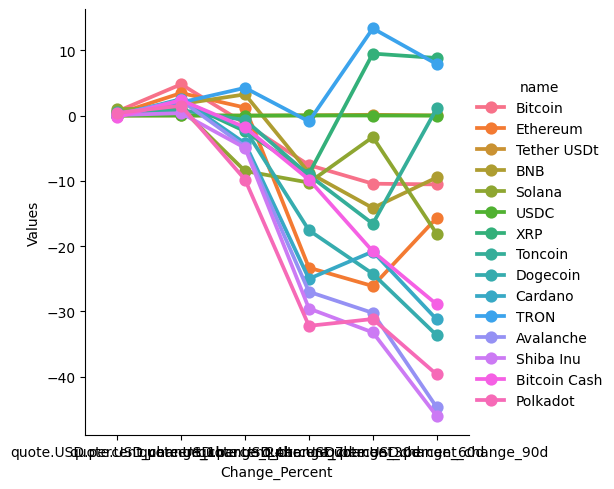

In [58]:
sns.catplot(x='Change_Percent',y='Values',hue='name',kind='point', data=df6)

In [59]:
df6.columns

Index(['name', 'Change_Percent', 'Values'], dtype='object')

In [60]:
df6['Change_Percent']= df6['Change_Percent'].replace(['quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [61]:
df6

,name,Change_Percent,Values
0,Bitcoin,1h,0.63410
1,Bitcoin,24h,4.78828
2,Bitcoin,7d,-1.24051
3,Bitcoin,30d,-7.59240
4,Bitcoin,60d,-10.44667
5,Bitcoin,90d,-10.55179
6,Ethereum,1h,0.25948
7,Ethereum,24h,3.44797
8,Ethereum,7d,1.22121
9,Ethereum,30d,-23.32028


In [62]:
df10= df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,59808.80457,2024-08-17 00:32:14.957879
15,Bitcoin,59808.80457,2024-08-17 00:32:15.370654
30,Bitcoin,59816.87932,2024-08-17 00:33:15.861743
